In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

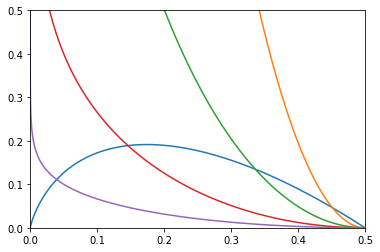

In [4]:
# RT = 0.6 # must be in seconds
# perf = 0.3

# Dcorr = 6.450 # correct trial ITI in s
# Derr = -3.150 # additional penalty time (can be negative) in s
# T0 = 0.15 # non-decision time in s
    
# Dtot = Dcorr + T0 + Derr # mean iti for error trials, including non-decision time

# # DT = Dtot*0.45 ## NEED TO FIGURE THIS OUT
# DT = RT - T0
# # ER = 0.1 # measured error rate
# ER = 1 - perf # measured error rate
    
# RRactual = (1 - ER) / (DT + Dcorr + T0 + ER*Derr) # actual reward rate attained by the measured parameters
# Abar = (1 - 2*ER) / (2*DT)*np.log(1/ER - 1) # inferred signal to noise ratio (A/c)^2


def calculate_opc():
    #this function returns a dictionary with two arrays with which to plot an optimal performance curve (OPC)

    #eta = (A/sigma)^2 (signal to noise ratio (drift rate to noise))
    #theta = | threshold / A | (ratio of threshold over drift rate)
    
    #make arrays with all possible values for eta and theta
    etas = np.arange(0.0001, 4, 0.01)
    thetas = np.arange(0.0001, 2.5, 0.01)
    e, th = np.meshgrid(etas, thetas)
    #calculate possible error rates with etas and thetas
    #pre-calculate 2*etas to reduce clutter and make equation legible
    e_x_2 = np.multiply(2,e)
    p_err = (1/(1 + np.exp(e_x_2*th)))
    #p_err is a huge array of arrays, but we only need the last array
    ind = len(p_err) - 1
    p_err = p_err[ind]
    #calculate mean normalized decision time as a function of p_err
    #pre-calculate components of equation to reduce clutter and make equation legible
    term1 = 1 / np.multiply(p_err, np.log((1-p_err)/p_err))
    term2 = 1 / (1 - np.multiply(2, p_err))
    mean_norm_dt = 1 / (term1 + term2)

    return {'p_err': p_err, 'mean_norm_dt': mean_norm_dt}

opc_data = calculate_opc()

plt.plot(opc_data['p_err'], opc_data['mean_norm_dt'])
plt.ylim(0, 0.5)
plt.xlim(0, 0.5)

Abar = [0.025, 0.05, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 12.8]
Abar = [0.025, 0.1, 0.4, 1.6, 6.4]
Abar = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
Abar = [0.0625, 0.25, 1, 4]
    
# now compute the optimal reward rate given this SNR
    

z = np.logspace(-10,1,1000) # test a bunch of different thresholds

for snr in Abar:
    
    ERs = [1/(1 + np.exp(2*i*snr)) for i in z]
    DTs = [i*np.tanh(i*snr)/(0.16 + 3.15) for i in z]
    # RRs = [(1 - i)/(j + Dcorr + T0 + i*Derr) for i,j in zip(ERs, DTs)]
    # RRoptimal = np.max(RRs)
    # opportunity_cost = 1 - RRactual/RRoptimal # percentage of optimal reward that they are sacrificing

    plt.plot(ERs, DTs)
    plt.ylim(0, 0.5)
    plt.xlim(0, 0.5)
#     plt.savefig('perf_frontiers.pdf')